In [29]:
import pandas as pd
import re

rawWineDF = pd.read_csv("../Data/winemag-data-130k-v2.csv")
rawWineDF['Year'] = ''
##############################################################################
def GetYear(strn):
    yearValue = 'Nan'
    try: yearValue = int(re.findall('(\d{4})', strn)[0])
    except: yearValue = 'Nan' 
    return yearValue
##############################################################################
rawWineDF.Year = rawWineDF.apply(lambda row: GetYear(row.title),axis=1)
##############################################################################
rawWineDF.to_csv('../Data/WineData.csv')
wineDF = rawWineDF[['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'title', 'variety', 'winery', 'Year']]
wineDF = wineDF.rename(columns={'region_1': 'region'})

In [30]:
wineDF.head()

,country,description,designation,points,price,province,region,title,variety,winery,Year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [31]:
temp = wineDF.country.dropna()

In [32]:
wineDF.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [33]:
temp.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China', 'Egypt'], dtype=object)

In [34]:
len(wineDF) -len(temp)

63

In [35]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Create a winery score dataframe
winery_group = wineDF.groupby(["winery"])
winery_average_score = winery_group["points"].mean()
winery_average_price = winery_group["price"].mean()
winery_count = winery_group["points"].count()

winery_df = pd.DataFrame({"Winery average score":winery_average_score,"Winery average price":winery_average_price,"Wines by winery":winery_count})

# Remove from calculations wineries with less than 100 wines reviewed
winery_df_100 = winery_df[winery_df["Wines by winery"] > 100].reset_index()
winery_df.head()

,Winery average score,Winery average price,Wines by winery
winery,,,
1+1=3,86.666667,18.333333,6
10 Knots,83.250000,24.750000,4
100 Percent Wine,86.333333,18.000000,3
1000 Stories,90.500000,19.000000,2
1070 Green,88.000000,25.000000,1


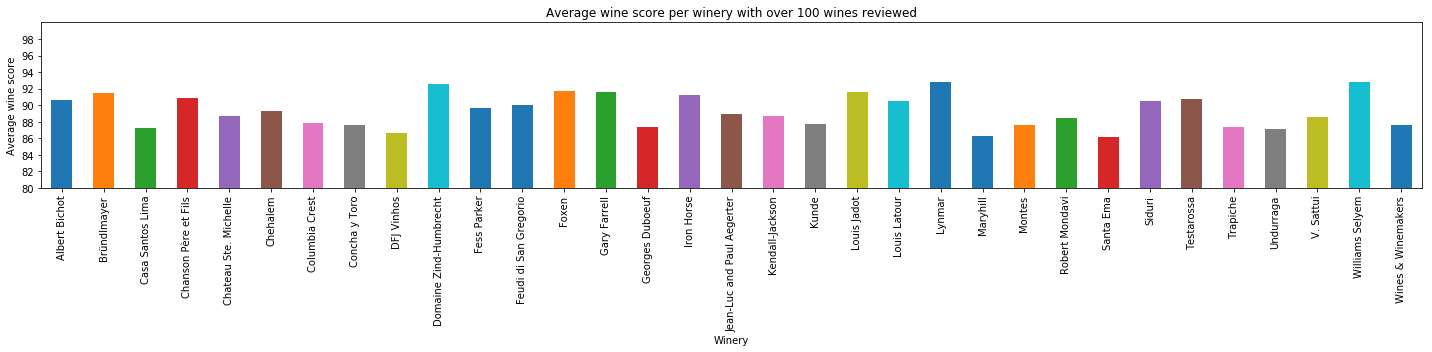

In [37]:
# Plot scores per each winery
winery_df_100.plot.bar(x="winery",y="Winery average score",figsize=(20,5),yticks=np.arange(80,100,2),ylim=(80,100),legend=False)
plt.xlabel("Winery")
plt.ylabel("Average wine score")
plt.title("Average wine score per winery with over 100 wines reviewed")
plt.tight_layout()
plt.savefig("Average_wine_scores.png")
plt.show()

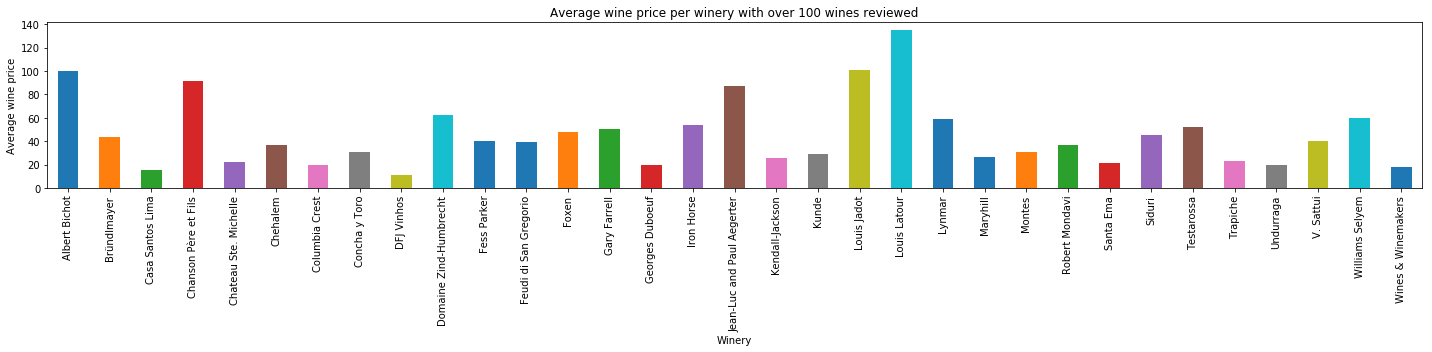

In [38]:
# Plot prices
winery_df_100.plot.bar(x="winery",y="Winery average price",figsize=(20,5),legend=False,rot=90)
plt.xlabel("Winery")
plt.ylabel("Average wine price")
plt.title("Average wine price per winery with over 100 wines reviewed")
plt.tight_layout()
plt.savefig("Average_wine_prices.png")
plt.show()


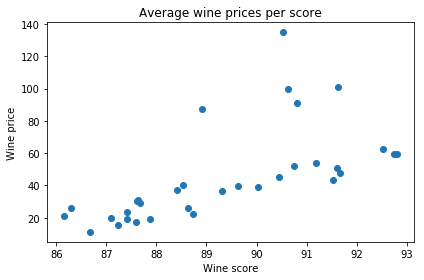

In [39]:
# Create a scatter plot to show the correlation between average scores and average prices per winery
plt.scatter(winery_df_100["Winery average score"],winery_df_100["Winery average price"])
plt.xlabel("Wine score")
plt.ylabel("Wine price")
plt.title("Average wine prices per score")
plt.tight_layout()
plt.savefig("Prices_scores_correlation.png")
plt.show()